## Titanic Survived 예측

#### + one hot encoding

In [1]:
# python ver / anaconda ver 맞는지 확인 필 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### train data 

In [3]:
import csv
train = pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.shape

(891, 12)

#### test data

In [7]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.shape

(418, 11)

In [11]:
# train 결측값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# test 결측값
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 데이터 분포

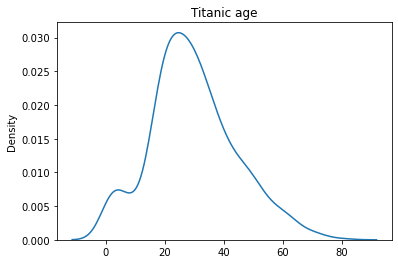

In [13]:
# Age



import seaborn as sns

x = train['Age'].values

sns.kdeplot(x)
plt.title('Titanic age')

plt.show()

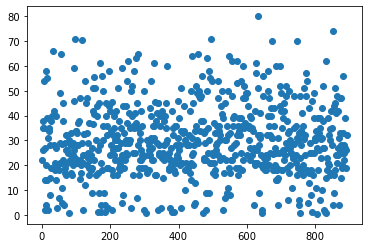

In [14]:
x = train['PassengerId'].values
y = train['Age'].values
plt.scatter(x,y)
plt.show()

In [15]:
# Age 편차

print(train['Age'].std())

14.526497332334044


In [16]:
# Embarked

train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# z = df['Embarked'].values

#sns.distplot(z, kde=True, rug=True)
#plt.title('Titanic embarked')
#plt.show()

# ked(밀도), rug(위치) 동시 
# 곧 없어진다고 

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


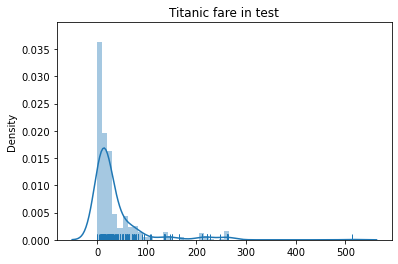

In [18]:
# fare

y1 = test['Fare'].values

sns.distplot(y1, kde=True, rug=True)
plt.title('Titanic fare in test')
plt.show()

#### 결측치 처리

Age -> 평균 29.69

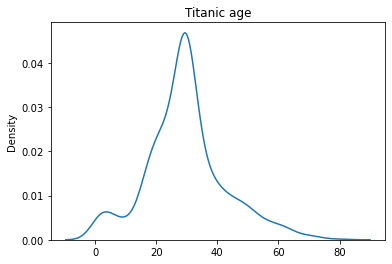

In [19]:
train['Age'] = train['Age'].fillna(29.69)     # train
test['Age'] = test['Age'].fillna(29.69)   # test

x = train['Age'].values

sns.kdeplot(x)
plt.title('Titanic age')

plt.show()

Embarked -> 최빈값 S(0)

In [20]:
train['Embarked'] = train['Embarked'].fillna('S')

Fare -> 최빈값 8.05

In [21]:
fare = train['Fare']
fare.mode()

0    8.05
dtype: float64

In [22]:
test['Fare'] = test['Fare'].fillna(8.05)

#### 새 변수 생성

In [23]:
# age_gr / married / f_nm / f_ox 

Age > Age_gr

In [24]:
def age_gr(x):
    if x < 5 :
       return 'very young'
    if 5<=x<10:
       return 'young'
    if 10<=x<16:
       return 'children'
    if 16<=x<20:
       return 's_adult'    # 16세~ 성인 간주 
    if 20<=x<30:
       return '20s'
    if 30<=x<40:
       return '30s'
    if 40<=x<50:
       return '40s'
    if 50<=x<60:
       return '50s'
    if 60<=x<70:
       return '60s'
    if 70<=x<80:
       return '70s'
    if 80<=x<90:
       return '80s'


In [25]:
train['Age_gr'] = train['Age'].apply(lambda x:age_gr(x))
test['Age_gr'] = test['Age'].apply(lambda x:age_gr(x))

f_nm

In [26]:
train['F_nm'] = train['SibSp'] + train['Parch']
test['F_nm'] = test['SibSp'] + test['Parch']

f_ox

In [27]:
def f_ox(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1   

In [28]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

Name > Married

In [29]:
train['Name'] = train['Name'].str.split(',').str[1]
train['Name'] = train['Name'].str.split('.').str[0]
train['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [30]:
n = [' Don',' Rev', ' Mme',' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkgeer']

for i in n:
    print(train[train['Name']==i]['Name'])

# 총 14명 

30     Don
Name: Name, dtype: object
149     Rev
150     Rev
249     Rev
626     Rev
848     Rev
886     Rev
Name: Name, dtype: object
369     Mme
Name: Name, dtype: object
641     Mlle
710     Mlle
Name: Name, dtype: object
647     Col
694     Col
Name: Name, dtype: object
745     Capt
Name: Name, dtype: object
759     the Countess
Name: Name, dtype: object
Series([], Name: Name, dtype: object)


In [31]:
condition = train['Name']==' Rev'
train[condition]

#  구글 영어번역 검색 '신부님'
# 실제 최소 27세~ 의 남성, sibsp/parch가 0~1명, 2class(?)
# 미혼으로.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
149,150,0,2,Rev,male,42.0,0,0,244310,13.000,NaN,S,40s,0,0
150,151,0,2,Rev,male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,50s,0,0
249,250,0,2,Rev,male,54.0,1,0,244252,26.000,NaN,S,50s,1,1
626,627,0,2,Rev,male,57.0,0,0,219533,12.350,NaN,Q,50s,0,0
848,849,0,2,Rev,male,28.0,0,1,248727,33.000,NaN,S,20s,1,1
886,887,0,2,Rev,male,27.0,0,0,211536,13.000,NaN,S,20s,0,0


In [32]:
test['Name'] = test['Name'].str.split(',').str[1]
test['Name'] = test['Name'].str.split('.').str[0]
test['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [33]:
my = [' Mr', ' Mrs']
mn = [' Miss', ' Master', ' Rev', ' Mlle']

train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)      

#### 문자열 -> 숫자형으로 인코딩

In [34]:
# sex / embarked / age_gr

In [35]:
# sex, embarked 레이블 인코딩
 
train['Sex'] = LabelEncoder().fit_transform(train.Sex)
test['Sex'] = LabelEncoder().fit_transform(test.Sex)

train['Embarked'] = LabelEncoder().fit_transform(train.Embarked)
test['Embarked'] = LabelEncoder().fit_transform(test.Embarked)

train['Age_gr'] = LabelEncoder().fit_transform(train.Age_gr)
test['Age_gr'] = LabelEncoder().fit_transform(test.Age_gr)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1,1,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,2,1,1,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,2,1,0,0,0


In [36]:
train.col = print(list(train.columns))
train.col

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_gr', 'F_nm', 'F_ox', 'Married']


In [37]:
# 모든 변수 원핫 인코딩

def oh_encoding(x):
    for i in train.col:
        return pd.get_dummies(train[i], prefix= i)


In [38]:
# ???
# train.get_dummies(train['Pclass'], columns='Pclass', prefix= 'Pclass')

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1,1,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,2,1,1,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,2,1,0,0,0


In [ ]:
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

In [ ]:
train['Pclass'] = train['Pclass'].apply(lambda x: oh_encoding(x))

TypeError: 'NoneType' object is not iterable

#### 필요없는 변수 drop

In [ ]:
# cabin, ticket, Name, Age
# ticket은 문자열/숫자로 나누고 싶은데 잘 안되네 

train = train.drop(['Cabin', 'Ticket', 'Name','Age'], axis=1)
test = test.drop(['Cabin', 'Ticket','Name', 'Age'], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,1,1,0,7.2500,2,0,1,1,0
1,2,1,1,0,1,0,71.2833,0,1,1,1,0
2,3,1,3,0,0,0,7.9250,2,0,0,0,1
3,4,1,1,0,1,0,53.1000,2,1,1,1,0
4,5,0,3,1,0,0,8.0500,2,1,0,0,0


#### 변수 간 상관관계 구하기

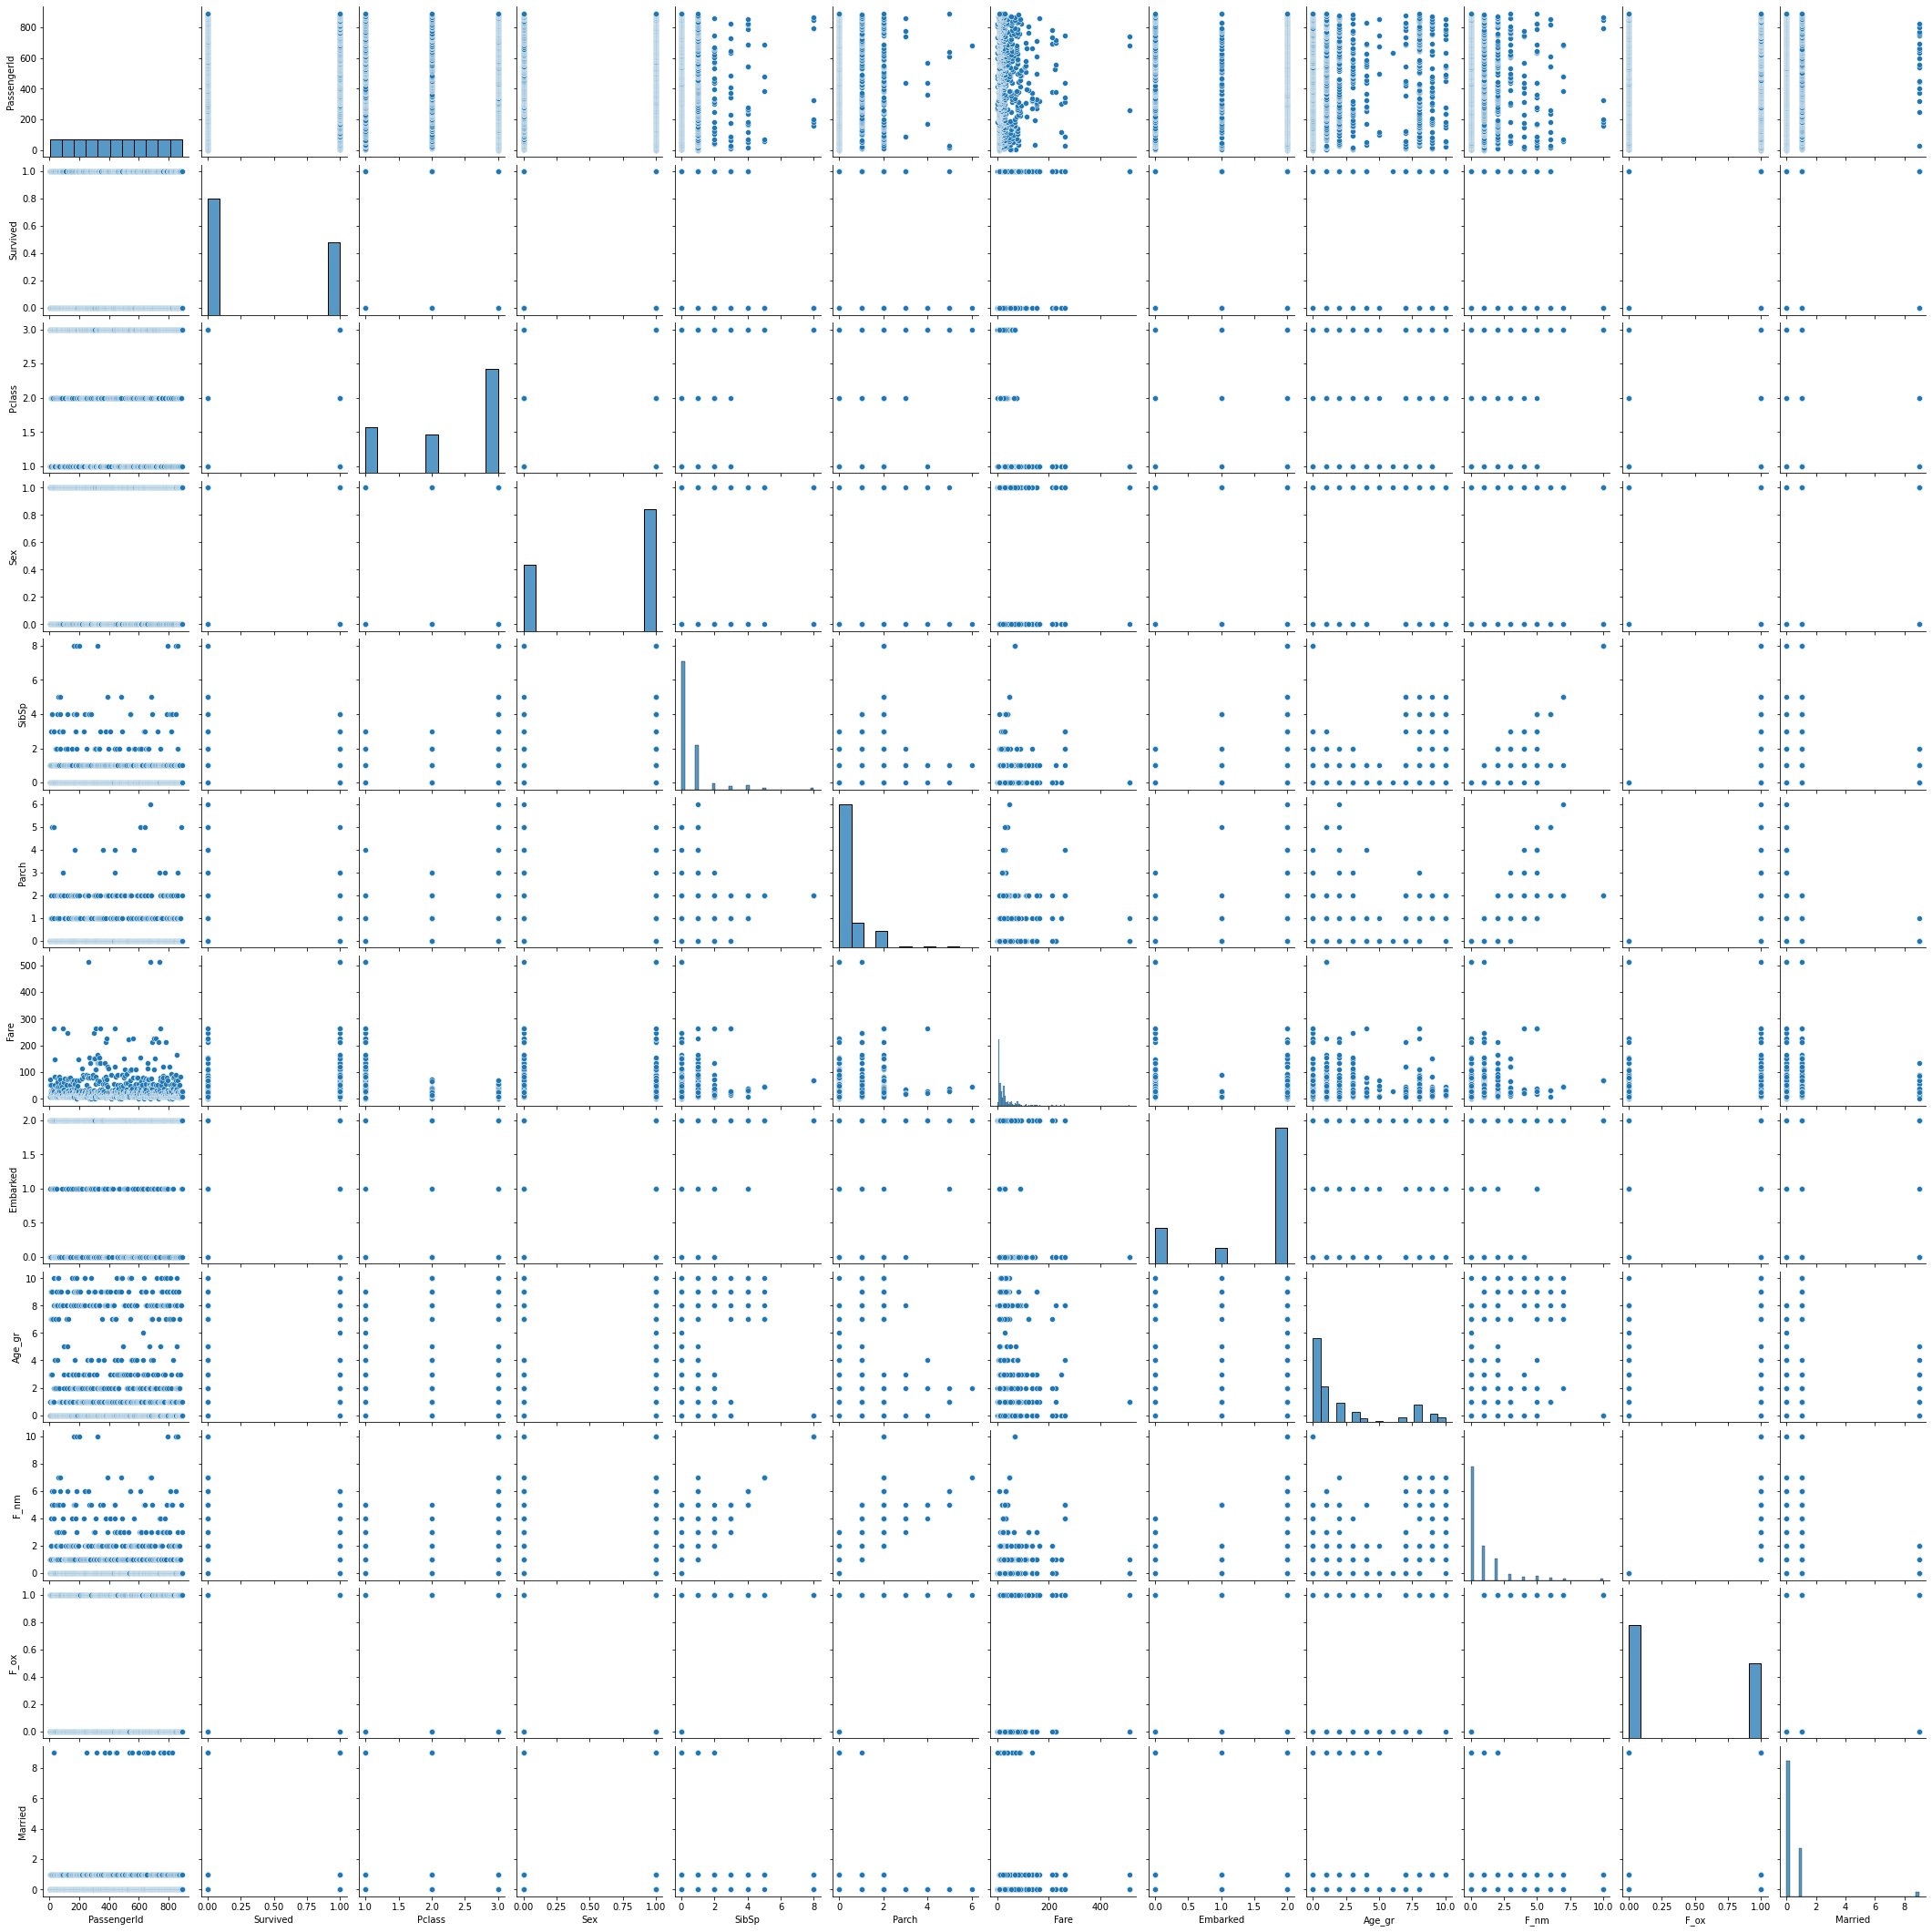

In [ ]:
sns.pairplot(train,diag_kind='hist')
plt.show()

#### 분류 모델

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,1,1,0,7.2500,2,0,1,1,0
1,2,1,1,0,1,0,71.2833,0,1,1,1,0
2,3,1,3,0,0,0,7.9250,2,0,0,0,1
3,4,1,1,0,1,0,53.1000,2,1,1,1,0
4,5,0,3,1,0,0,8.0500,2,1,0,0,0


train, test split

In [ ]:
X = train.iloc[:,2:].values
y = train['Survived']
X.shape, y.shape

((891, 10), (891,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 10), (179, 10), (712,), (179,))

회귀는 target 값이 연속적인 숫자가 아니므로 적합하지 X

In [ ]:
# k 최근접 이웃 회귀
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knr.score(X_test, y_test)

0.21136231884057965

Decisiontree분류

In [ ]:
from sklearn.tree import DecisionTreeClassifier

D=DecisionTreeClassifier()
D.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
D.score(X_test, y_test)

0.776536312849162